In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [4]:
X.shape, y.shape

((2000, 20), (2000,))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfc = RandomForestClassifier()

In [10]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
y_train_pred = rfc.predict_proba(X_train)

In [12]:
roc_auc_score(y_train, y_train_pred[:,1])

1.0

In [13]:
y_test_pred = rfc.predict_proba(X_test)

In [14]:
roc_auc_score(y_test, y_test_pred[:,1])

0.9809277777777777

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_train_pred = lr.predict_proba(X_train)

In [19]:
roc_auc_score(y_train, y_train_pred[:,1])

0.9863568922694498

In [20]:
y_test_pred = lr.predict_proba(X_test)

In [21]:
roc_auc_score(y_test, y_test_pred[:,1])

0.9885777777777777

# Adaboost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
abc = AdaBoostClassifier()

In [24]:
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [25]:
y_train_pred = abc.predict_proba(X_train)

In [26]:
roc_auc_score(y_train, y_train_pred[:,1])

0.9975081174960356

In [27]:
y_test_pred = abc.predict_proba(X_test)

In [28]:
roc_auc_score(y_test, y_test_pred[:,1])

0.9826111111111111

# KNN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knc = KNeighborsClassifier()

In [31]:
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
y_train_pred = knc.predict_proba(X_train)

In [33]:
roc_auc_score(y_train, y_train_pred[:,1])

0.981670071491109

In [34]:
y_test_pred = knc.predict_proba(X_test)

In [35]:
roc_auc_score(y_test, y_test_pred[:,1])

0.9426111111111111

In [36]:
pred = []
for model in [rfc, lr, abc, knc]:
  pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
fin_pred = pd.concat(pred,axis=1).mean(axis=1)

In [37]:
fin_pred

0      0.880262
1      0.118323
2      0.813783
3      0.747853
4      0.562447
         ...   
595    0.126340
596    0.115345
597    0.876697
598    0.165717
599    0.834857
Length: 600, dtype: float64

In [38]:
fpr, tpr, threshold = roc_curve(y_test, fin_pred)

In [39]:
threshold

array([1.90822553, 0.90822553, 0.90656694, 0.90577475, 0.79748136,
       0.79662833, 0.78725303, 0.78321156, 0.75803202, 0.75787124,
       0.74479835, 0.74387362, 0.72157482, 0.71643711, 0.65787883,
       0.65743537, 0.60494697, 0.59675354, 0.59656376, 0.58864346,
       0.5865152 , 0.58550386, 0.57327749, 0.57139283, 0.53865858,
       0.48616892, 0.45200602, 0.39225652, 0.38379719, 0.34361558,
       0.34086612, 0.24901541, 0.24146893, 0.22848126, 0.22640421,
       0.20963088, 0.20098417, 0.12038782, 0.1203351 , 0.10632697])

In [40]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_ls = []
for thres in threshold:
  y_pred = np.where(fin_pred > thres, 1, 0)
  accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))


In [43]:
accuracy_ls = pd.concat([pd.Series(threshold), pd.Series(accuracy_ls)], axis=1)

In [44]:
accuracy_ls.columns = ['threshold', 'accuracy']

In [45]:
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)

In [46]:
accuracy_ls.head()

,threshold,accuracy
26,0.452006,0.961667
24,0.538659,0.960000
25,0.486169,0.958333
23,0.571393,0.951667
22,0.573277,0.950000


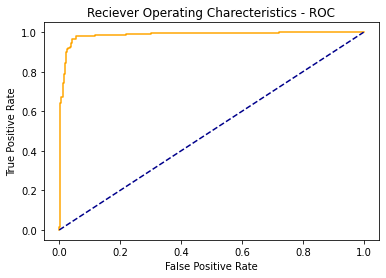

In [47]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Charecteristics - ROC')
plt.show()